### Linear Regression in Tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
noise = np.random.randn(1,2000)*0.1
wxb = (np.matmul(w_real,x_data.T) + b_real).reshape(1,2000) 
y_data = (np.matmul(w_real,x_data.T) + b_real) + noise

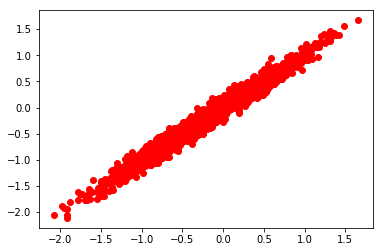

In [40]:
plt.figure(figsize=(6,4))
plt.plot(wxb, y_data, 'ro')
plt.show()

Step#  0 , Cost: 0.260934 , Weights:  [[ 0.05888444  0.09943926  0.01930491]] , Biases:  -0.0421727
Step#  5 , Cost: 0.0376447 , Weights:  [[ 0.2194259   0.36862648  0.07359841]] , Biases:  -0.151478
Step#  10 , Cost: 0.0131941 , Weights:  [[ 0.27352527  0.45801136  0.09289785]] , Biases:  -0.184654
Optimization steps complete at #  15 , Cost: 0.0106911 , Weights:  [[ 0.28953058  0.48406631  0.098852  ]] , Biases:  -0.193486
(3, 2000)


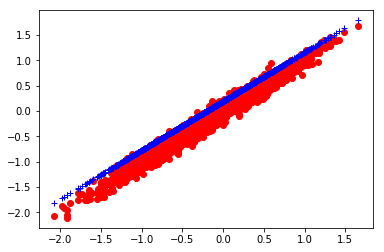

In [44]:
NUM_STEPS = 15
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    learning_rate = tf.placeholder(tf.float32,shape=None)
    with tf.name_scope('coefficients') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
        
    with tf.name_scope('train') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(optimizer,feed_dict={x: x_data, y_true: y_data, learning_rate: 0.1})
            if (step % 5 == 0):
                c=sess.run(loss,feed_dict={x: x_data, y_true: y_data, learning_rate: 0.1})
                print("Step# ",step,", Cost:",c,", Weights: ",sess.run(w),", Biases: ",sess.run(b))
        c=sess.run(loss,feed_dict={x: x_data, y_true: y_data})
        print("Optimization steps complete at # ",NUM_STEPS,", Cost:",c,", Weights: ",sess.run(w),", Biases: ",sess.run(b))
        
        print(x_data.T.shape)
        plt.plot(wxb, y_data, 'ro')
        plt.plot(wxb, np.dot(sess.run(w),x_data.T),'b+')
        plt.legend()
        plt.show()